<a href="https://colab.research.google.com/github/sultanardia/COVID-19-Identification-using-CNN/blob/main/COVID_19_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import shutil
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [ ]:
CATS = ['CT_COVID', 'CT_NonCOVID']
DIR = '/content/drive/MyDrive/Dataset/Covid19-1'

resize = 100
asset = []

for category in CATS:
    folder = os.path.join(DIR, category)
    idx = CATS.index(category)

    for img in os.listdir(folder):
        path = os.path.join(folder, img)
        img_raw = cv2.imread(path)
        img_resize = cv2.resize(img_raw, (resize, resize))
        asset.append([img_resize, idx])

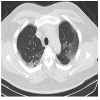

In [ ]:
cv2_imshow(asset[0][0])

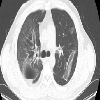

In [ ]:
cv2_imshow(asset[150][0])

In [ ]:
X, y = [], []

for img, label in asset:
    X.append(img)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train_new = X_train/255
X_test_new = X_test/255

y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [ ]:
train_generator = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 15,
    zoom_range = 5,
    horizontal_flip = True,
    validation_split = 0.2
)

test_generator = ImageDataGenerator(
    rescale = 1/255
)

In [ ]:
train = train_generator.flow(X_train, y_train_new, subset = 'training')
validation = train_generator.flow(X_train, y_train_new, subset = 'validation')
test = test_generator.flow(X_test, y_test_new)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, input_shape = (resize, resize, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3))

model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3))

model.add(Flatten())

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 2, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 2, 2, 128)      

In [ ]:
model.fit(x = train, epochs = 10, validation_data = validation)

Epoch 1/10
15/15 [==============================] - 6s 383ms/step - loss: 0.7002 - accuracy: 0.5367 - val_loss: 0.6849 - val_accuracy: 0.6387
Epoch 2/10
15/15 [==============================] - 6s 364ms/step - loss: 0.6867 - accuracy: 0.5325 - val_loss: 0.6682 - val_accuracy: 0.6218
Epoch 3/10
15/15 [==============================] - 5s 363ms/step - loss: 0.6852 - accuracy: 0.5723 - val_loss: 0.6699 - val_accuracy: 0.5714
Epoch 4/10
15/15 [==============================] - 5s 363ms/step - loss: 0.6771 - accuracy: 0.5807 - val_loss: 0.6887 - val_accuracy: 0.5546
Epoch 5/10
15/15 [==============================] - 5s 362ms/step - loss: 0.6792 - accuracy: 0.5828 - val_loss: 0.6730 - val_accuracy: 0.6218
Epoch 6/10
15/15 [==============================] - 5s 360ms/step - loss: 0.6713 - accuracy: 0.5870 - val_loss: 0.6915 - val_accuracy: 0.5210
Epoch 7/10
15/15 [==============================] - 5s 359ms/step - loss: 0.6707 - accuracy: 0.6059 - val_loss: 0.6865 - val_accuracy: 0.5546
Epoch 

In [ ]:
model.evaluate(test)

5/5 [==============================] - 0s 74ms/step - loss: 0.6726 - accuracy: 0.5267


[0.672625720500946, 0.5266666412353516]